# Airlines passangers satisfaction prediction

### Project Description
In this project I used dataset contains an airline passenger satisfaction survey and the goal was to determine what factors contribute most to customer satisfaction. In addition various models were used on order to predict passenger satisfaction.

In [1]:
from collections import defaultdict

import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from sklearn.feature_selection import SelectFromModel
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve, \
    confusion_matrix, euclidean_distances, mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing, svm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.utils import shuffle
import random
import warnings

## 1. Download Data set

In [2]:
random.seed(42)
warnings.simplefilter(action='ignore', category=FutureWarning)
train = pd.read_csv('train.csv')

train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
train.shape

(103904, 25)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Variable Description
1. Id : Unique id number to each passenger.
2. Gender: Gender of the passengers (Female, Male)
3. Customer Type: The customer type (Loyal customer, disloyal customer)
4. Age: The actual age of the passengers
5. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
6. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
7. Flight distance: The flight distance of this journey
8. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
9. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
10. Ease of Online booking: Satisfaction level of online booking
11. Gate location: Satisfaction level of Gate location
12. Food and drink: Satisfaction level of Food and drink
13. Online boarding: Satisfaction level of online boarding
14. Seat comfort: Satisfaction level of Seat comfort
15. Inflight entertainment: Satisfaction level of inflight entertainment
16. On-board service: Satisfaction level of On-board service
17. Leg room service: Satisfaction level of Leg room service
18. Baggage handling: Satisfaction level of baggage handling
19. check-in service: Satisfaction level of Check-in service
20. Inflight service: Satisfaction level of inflight service
21. Cleanliness: Satisfaction level of Cleanliness
22. Departure Delay in Minutes: Minutes delayed when departure
23. Arrival Delay in Minutes: Minutes delayed when Arrival
24. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [5]:
test = pd.read_csv('test.csv')

test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
test.shape

(25976, 25)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Only Arrival_Delay_in_Munites column has missing vaslues.

## 2+3. Preprocessing & EDA

In [8]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)

In [9]:
train['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [10]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
train['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [12]:
train['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [13]:
train['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

#### Missing values

In [14]:
#only Arrival Delay in Minutes has missing values
train['Arrival Delay in Minutes'].isna().sum()

310

Arrival delay in Minutes has 310 missing value

In [15]:
# explore missing data
train[train['Arrival Delay in Minutes'].isna()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [16]:
# replace missing value with mean
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].mean())
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].mean())

#### Convert satisfaction to numeric values

In [17]:
#convert satisfaction to numeric values
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [18]:
numerical_features = train.select_dtypes(exclude=['object']).drop(["satisfaction"],axis=1).copy()
numerical_features.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

#### Remove outliers

In [19]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                                    24.0
Flight Distance                      1329.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
On-board service                        2.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
satisfaction                            1.0
dtype: float64


In [20]:
# Removing outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(74931, 23)

In [21]:
test = test[~((test < (Q1 - 1.5 * IQR)) |(test > (Q3 + 1.5 * IQR))).any(axis=1)]
test.shape

(18698, 23)

#### Convert data type
since not all algorithms working well with a mix of categorial and numeric data, we decided to convert categorial features to numeric using lable encoder.


In [22]:
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col]= preprocessing.LabelEncoder()
    lencoders[col].fit(train[col])
    le_name_mapping = dict(zip(lencoders[col].classes_, lencoders[col].transform(lencoders[col].classes_)))
    print(le_name_mapping)

{'Female': 0, 'Male': 1}
{'Loyal Customer': 0, 'disloyal Customer': 1}
{'Business travel': 0, 'Personal Travel': 1}
{'Business': 0, 'Eco': 1, 'Eco Plus': 2}


In [23]:
# handle categorical values with Label Encoding for train
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [24]:
# handle categorical values with Label Encoding for test
lencoders = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    test[col] = lencoders[col].fit_transform(test[col])

#### Combine data frames into a single one

In [25]:
combined_df = pd.concat([train, test])
combined_df = shuffle(combined_df)

<Figure size 576x360 with 0 Axes>

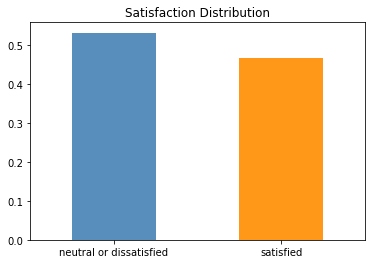

In [26]:
# Satisfation distribution plot
fig = plt.figure(figsize = (8,5))
fig, ax = plt.subplots()
combined_df.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['steelblue', 'darkorange'], alpha = 0.9, rot=0)
x_labels = ['neutral or dissatisfied', 'satisfied']
ax.set_xticklabels(x_labels)
plt.title('Satisfaction Distribution')
plt.show()

The above plot shows a distribution of around 55:45 between neutral/dissatisfied passengers and satisfied passengers respectively. The data is quite balanced.

#### Plot bar histograms and feature distributions for satisfaction
In this section we will explore the satisfaction distribution for each feature.

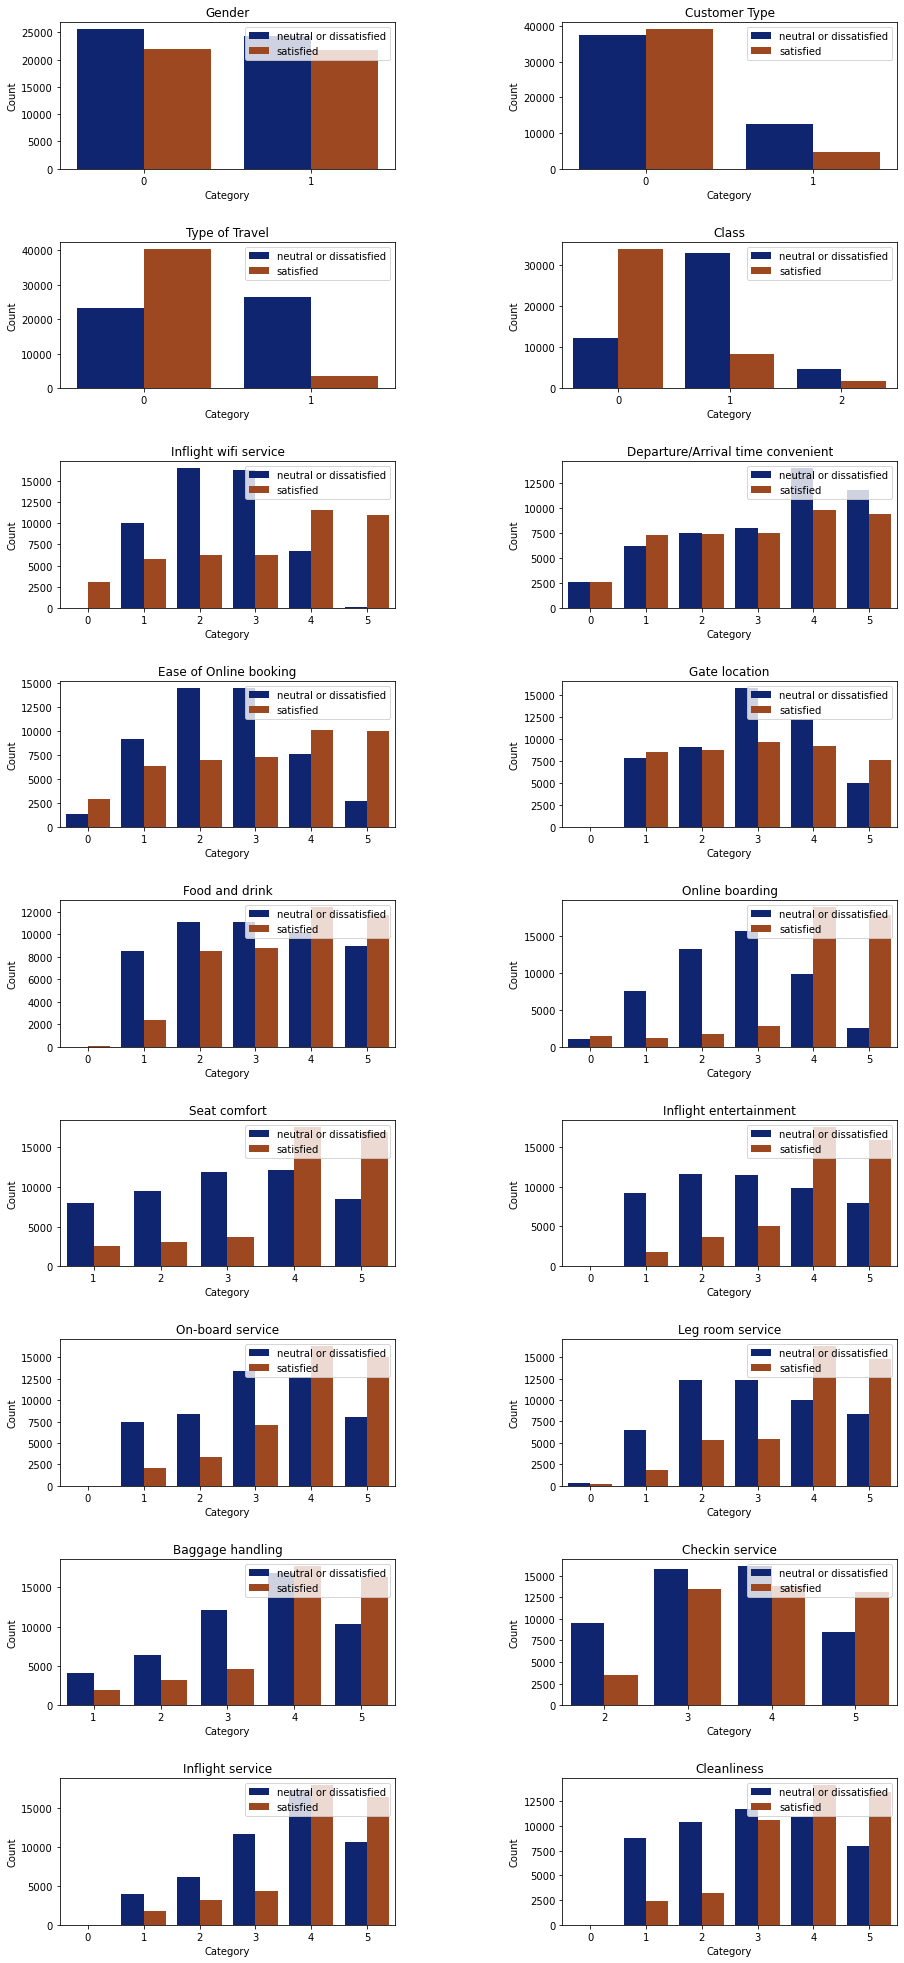

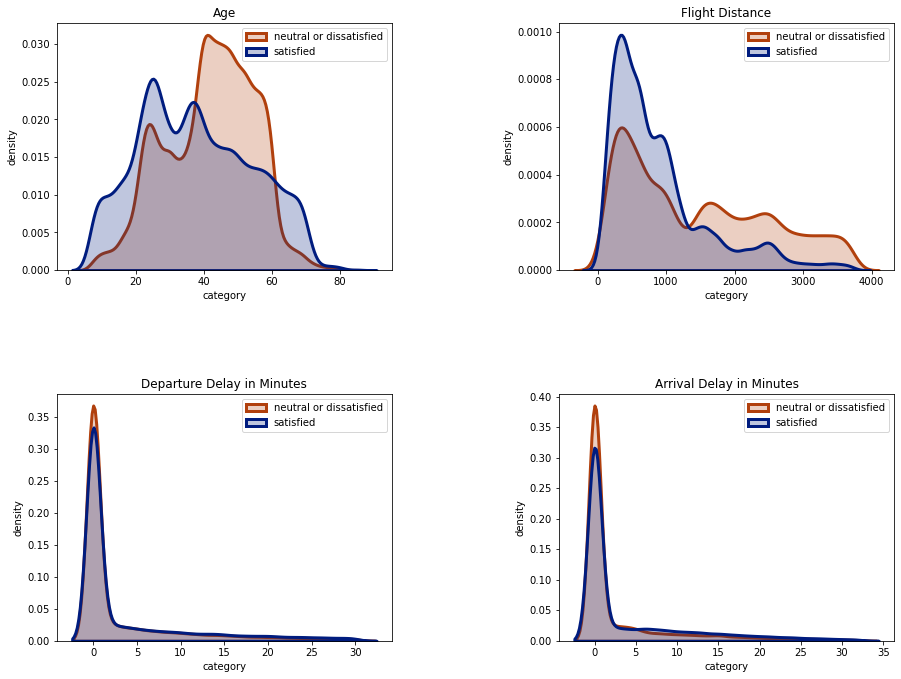

In [27]:
sns.set_palette('dark')
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
gs = GridSpec(9, 2)

categorial = ['Gender', 'Customer Type','Type of Travel', 'Class',
       'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
numeric = [ 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# display satisfaction rate per catagory
for i, var in enumerate(categorial):
    plt.subplot(gs[i//2, i%2], title=var.replace('_',' '))
    g=sns.countplot(data=combined_df, x=var, hue="satisfaction")
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.legend(loc='upper right', labels=['neutral or dissatisfied','satisfied'])

plt.show()

# display satisfaction rate per numeric feature
sns.set_palette('dark')
plt.figure(figsize=(15,25))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
gs = GridSpec(4, 2)

for i, var in enumerate(numeric):
    plt.subplot(gs[i//2, i%2], title=var.replace('_',' '))
    sns.kdeplot(data=combined_df, x=var, hue="satisfaction", fill=True, common_norm=False, palette="dark", shade=True,
    linewidth=3)
    plt.xlabel('category')
    plt.ylabel('density')
    plt.legend(loc='upper right', labels=['neutral or dissatisfied','satisfied'])
plt.show()

Gender:
Gender distribution of neutral/dissatisfied and satisfied customers are similar. For both male and female passengers, number of neutral/dissatisfied customers are higher when compared to number of satisfied customers.

Customer Type:
Loyal Customers (0) which are higher in number, have similar distribution of neutral/dissatisfied and satisfied customers.
However, disloyal Customers (1) are less satusfied customers.

Type of travel:
Passengers who are going to a personal travel (1) are less satisfaied than passengers in  a business travel (0).

Class:
Passengers in Business class (0) are the most satisfaied compared to passengers in Eco (1) and Eco Plus (2) class.
Passengers in Eco calss has highest neutral/dissatisfied customers

*it can be assumed that passengers who are going to a personal travel usaully travel in Eco and Eco Plus classes and therfore they are lesss satisfaied

Ease of Online Booking, Seat Comfort, Cleanliness, Food and Drink, Checkin Service, Leg-room Service, On-board Service and Inflight Service, Inflight Entertainment, Inflight wi-fi Service, Gate location, Online boarding, Baggage handling:
For all of these features, maximum number of satisfied passengers belongs to the category who gave 4 and 5 rating. The passengers who gave rating below 4 are mostly neutral/dissatisfied.

Age:
From age 0-40 and from age 60-80, the number of ssatisfied passengers is  high compared to  neutral/dissatisfied  passengers. On the other hand, in age group 40-60, the number of neutral/dissatisfied passengers is higher compared to neutral/dissatisfied passengers.

Flight Distance:
Passengers are more satisfied in shorter flights (<1000) and are neutral/dissatisfied in longer flights.


#### Build a correlation matrix

<AxesSubplot:>

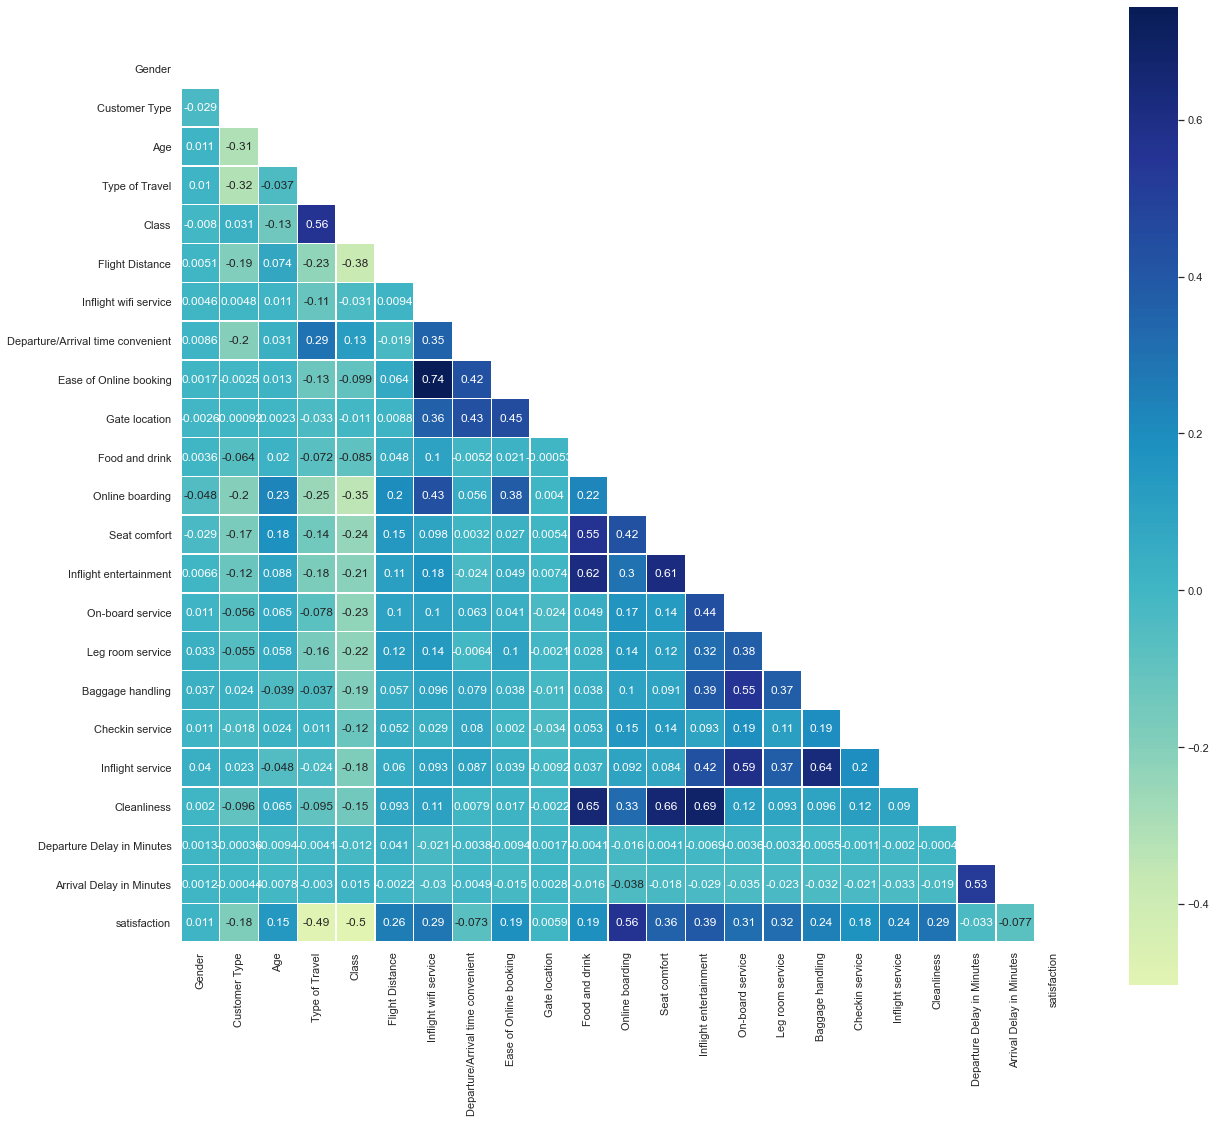

In [28]:
corr = combined_df.corr(method='spearman')
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0, square=True, linewidths=.5)

High correlation is considered as corralation above 0.5.
There is high corraltion between the following featurs:
1. class & Type of travel (0.56)
2. Ease of online booking & Inflight wifi service (0.74)
3. Food and drink & seat compfort (0.55)
4. Food and drink & Inflight entertamnment (0.62)
5. Seat compfort & Inflight entertamnment (0.61)
6. Food and drink & Cleanliness (0.65)
7. Seat compfort & Cleanliness (0.66)
8. Inflight entertamnment  & Cleanliness (0.69)
9. Onboard service & Baggage handaling (0.55)
10. Onboard service & Inflight service (0.59)
11. Online boarding & Satisfaction (0.56)
12. Baggage handaling & Inflight service (0.64)
13. Departure delay in minituses & Arraivel delay in minuts (0.53)

No pair  have corrrelation coefficient exactly equal to 1 or similar.
Therefore there is no perfect multi-collinearity, hence we will not discarding any variable.

##### Examine correlation with satisfaction 
In the following plot we will examin the correlation of all features with satisfaction in order to find the features which most correlated  with Satisfaction.

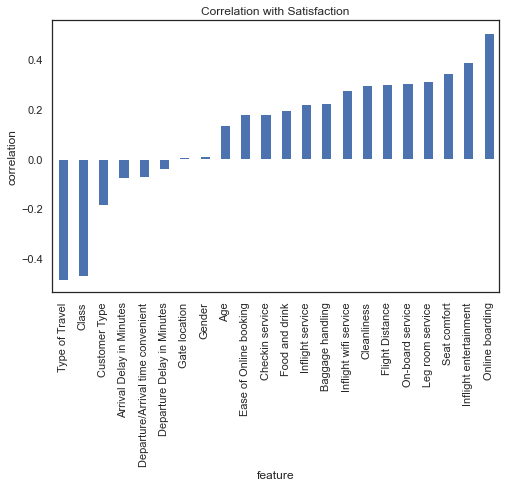

In [29]:
plt.figure(figsize = (8,5))
combined_df.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')
plt.xlabel('feature')
plt.ylabel('correlation')
plt.title("Correlation with Satisfaction")
plt.show()

Online boarding have maximum positive correlation with satisfaction.
Type of Travel and class also have strong (negative) correlation with customer satisfaction.
Other features which also contribute correlation with customer satisfaction are: inflight entertainment ,seat comfort, Leg room service, on board service, Flight Distance, cleanliness, Inflight wifi service.

From the plot above we can see we did'nt get good seperation between satisfied passengers and not satisfied using all the featurs. Thefore inportant feature selction will be done in the following sections.

#### Clean and Transform Dataset

Departure delay in minutes & arrivel delay in minutes are highly correlated and has very low correllation with satisfaction so we can drop them.
In adittion, gate location and gender are not related with satisfaction at all, so we will drop them too.

In [31]:
combined_df.drop(["Arrival Delay in Minutes","Departure Delay in Minutes","Gate location", "Gender"],axis=1,inplace=True)
train.drop(["Arrival Delay in Minutes","Departure Delay in Minutes","Gate location", "Gender"],axis=1,inplace=True)
test.drop(["Arrival Delay in Minutes","Departure Delay in Minutes","Gate location", "Gender"],axis=1,inplace=True)

## 4. Feature Selection

Two different approaches will be used in order to select features mainly affect customer satisfaction:
1. Use feature selection model using Support vector machines (SVM) and display the results with t-SNE and PCA algorithms.
2. Use correlation matrix to extract feature highly correlated with satisfaction, then use AgglomerativeClustering and display the results with t-SNE and PCA.

In [31]:
x_train = combined_df.drop(['satisfaction'], axis=1)
y_train = combined_df['satisfaction']

sc = StandardScaler()

#### 1. Use feature selection model using Support vector machines (SVM) and display the results with t-SNE/PCA

In [32]:
x_train = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
number_of_iterations = 10000
num_of_points = 103904 + 25976 #train +test
n_iterations_wo_prg = 200
perplexity = 50
l_rate = 90
verbose = 0

# Initialize SVM clustering model
model = svm.LinearSVC(C=1, penalty=f"l2", dual=False)

# Initialize SelectFromModel feature selector
selector = SelectFromModel(model.fit(x_train, y_train), prefit=True, threshold=0.09)#max_features=6)
# Get support vectors
support = selector.get_support()
# Extract features name
svm_features = x_train.loc[:, support].columns.tolist()
print(f"The selected features are: {svm_features}")


The selected features are: ['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'On-board service', 'Leg room service', 'Checkin service', 'Cleanliness']


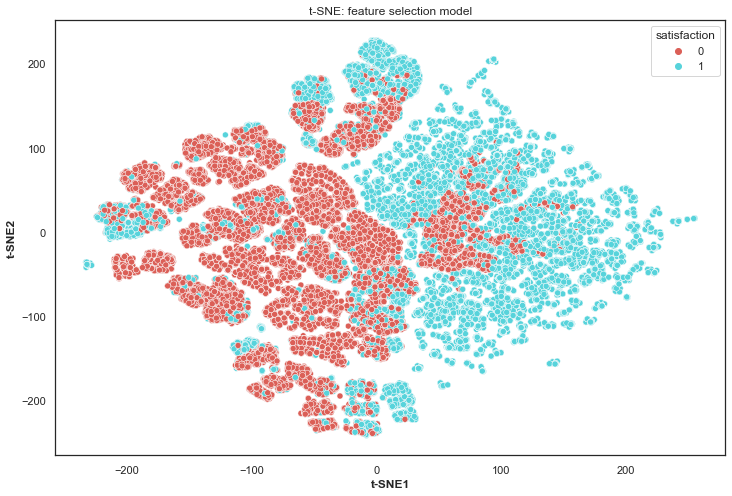

In [33]:
# Run dimension reduction with t-SNE
tsne = TSNE(perplexity=perplexity, n_iter=number_of_iterations, random_state=10,
            verbose=verbose, learning_rate=l_rate,
            n_iter_without_progress=n_iterations_wo_prg).fit_transform(
                                                         x_train[svm_features][:num_of_points])

plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=y_train[:num_of_points], palette=sns.color_palette('hls', np.unique(y_train).shape[0]))
plt.xlabel('t-SNE1', weight='bold', fontsize='12')
plt.ylabel('t-SNE2', weight='bold', fontsize='12')
plt.title('t-SNE: feature selection model')
plt.show()

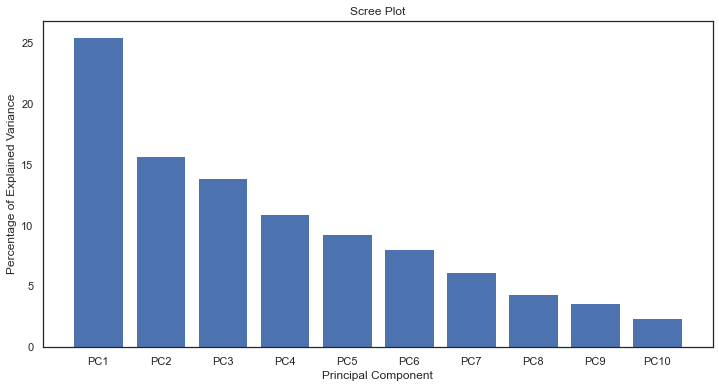

In [34]:
pca = PCA()
pca.fit( x_train[svm_features][:num_of_points])
pca_data = pca.transform(x_train[svm_features][:num_of_points])

# Display Variance Percentage
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(12,6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

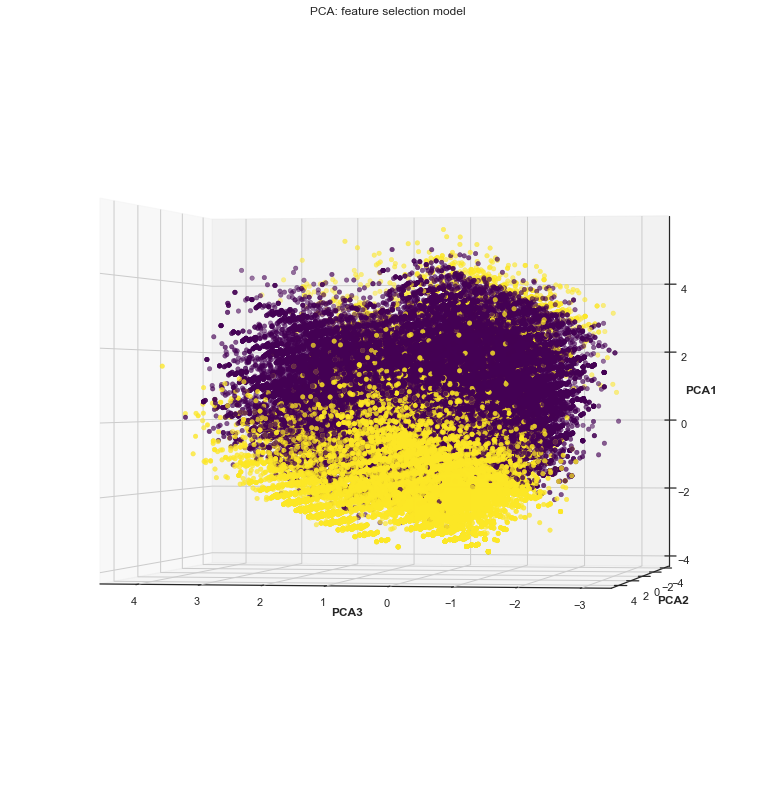

In [35]:
plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')

# Run dimension reduction with PCA
ax.scatter(pca_data[:, 2], pca_data[:, 1], pca_data[:, 0], c=y_train[:num_of_points],  cmap='viridis', linewidth=0.5);
ax.view_init(0, 100)
plt.draw()
ax.set_xlabel('PCA3', weight='bold', fontsize='12')
ax.set_ylabel('PCA2', weight='bold', fontsize='12')
ax.set_zlabel('PCA1', weight='bold', fontsize='12')
plt.title('PCA: feature selection model')
plt.show()

#### conclusion:
By examining the amount of variance each principal component encompasses we can see that the first 3 principal components explain roughly 55% of the variance. However we chose to present the first 3 PCA since we saw they provides good approximation to the overall data set.

In both cases: t-SNE and PCA we see a relativly good seperation (but not great) between statisfaction different values.
This brings us to the conclusion that the 'SelectFromModel'  didn't select the most impact features for statisfaction.
It can be seen the PCA's seperation is less clear than t-SNE

#### 2. Use correlation matrix extract to feature importance

The selected features are: 1           Online boarding
2            Type of Travel
3                     Class
4    Inflight entertainment
5              Seat comfort
6          Leg room service
7          On-board service
Name: index, dtype: object


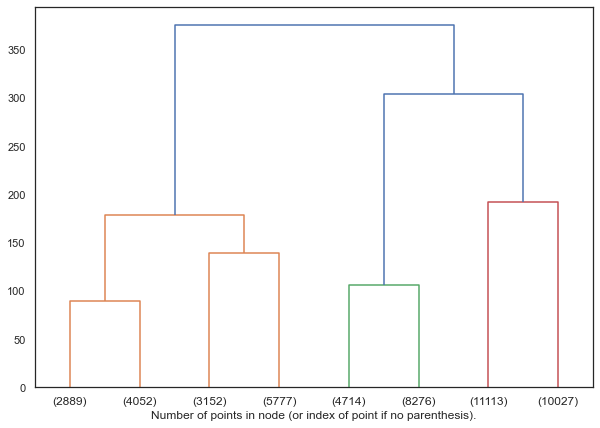

,cluster,Online boarding,Type of Travel,Class,Inflight entertainment,Seat comfort,Leg room service,On-board service,satisfaction
0,0,3.539584,0.0,0.351538,3.565309,3.634310,3.536361,3.533285,0.633021
1,1,2.836673,1.0,1.043352,3.044612,3.220542,3.084247,3.336988,0.114619


In [47]:
n_iterations_wo_prg = 300
perplexity = 50
l_rate = 100
verbose = 0
num_of_clusters = 2
num_of_features = 7

#since dendoram crashes with high amount of points, we restricted it to 10000
num_of_points = 10000
# Get satisfaction correlation with other features
correlations = combined_df.corr()['satisfaction'].abs().sort_values(ascending=False)

# Select the features with the highest correlation(ignore the first - Satisfaction)
agg_features = correlations.reset_index().iloc[1:num_of_features+1, 0]
print(f"The selected features are: {agg_features}")

# Initiate Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=num_of_clusters, compute_distances=True)
cluster.fit(x_train[agg_features][:num_of_points])

# Create linkage matrix:
# Create the counts of samples under each node
counts = np.zeros(cluster.children_.shape[0])
n_samples = len(cluster.labels_)

# The children of each non-leaf node.
for i, merge in enumerate(cluster.children_):
    current_count = 0
    for child_idx in merge:
        # Values less than n_samples correspond to leaves of the tree which are the original samples.
        if child_idx < n_samples:
            current_count += 1  # leaf node
        # A node i greater than or equal to n_samples is a non-leaf node and has children children_[i - n_samples].
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


# Stack 1-D arrays as columns into a 2-D array for dendrogram presentation.
linkage_matrix = np.column_stack([cluster.children_, cluster.distances_,
                                  counts]).astype(float)

plt.figure(figsize=(10, 7))
# Plot the corresponding dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=num_of_clusters)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


# Get statistics of the mean feature values per cluster with the original data
data_cluster = combined_df[agg_features][:num_of_points]
data_cluster['cluster'] = cluster.labels_
data_cluster['satisfaction'] = y_train[:num_of_points]
data_cluster = data_cluster.groupby(['cluster']).mean().reset_index()

data_cluster

 From the selected features clustering we can see that:
 * cluster 0 has 0.11 satisfaction rate
 * cluster 1 has 0.63 satisfaction rate.

Most of the satisfaction rate is characterized by a long flights with Business class.
Since it's a long flight it probably has a better inflight entertainment which also effect the satisfaction scores.

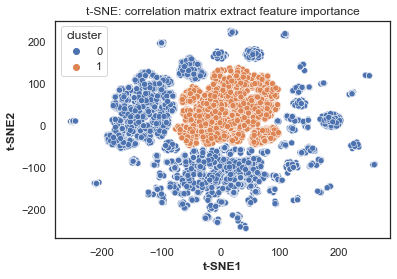

In [48]:
# Reduce data dimensions with t-SNE
tsne = TSNE(perplexity=perplexity, n_iter=number_of_iterations, random_state=10, verbose=verbose, learning_rate=l_rate,
            n_iter_without_progress=n_iterations_wo_prg).fit_transform(x_train[agg_features][:num_of_points])

# Combine t-SNE results with cluster labels and display in scatter plot
tsne = pd.DataFrame(tsne, columns=[0, 1])
tsne['cluster'] = cluster.labels_
sns.scatterplot(data=tsne, x=0, y=1, hue='cluster')
plt.xlabel('t-SNE1', weight='bold', fontsize='12')
plt.ylabel('t-SNE2', weight='bold', fontsize='12')
plt.title('t-SNE: correlation matrix extract feature importance')
plt.show()

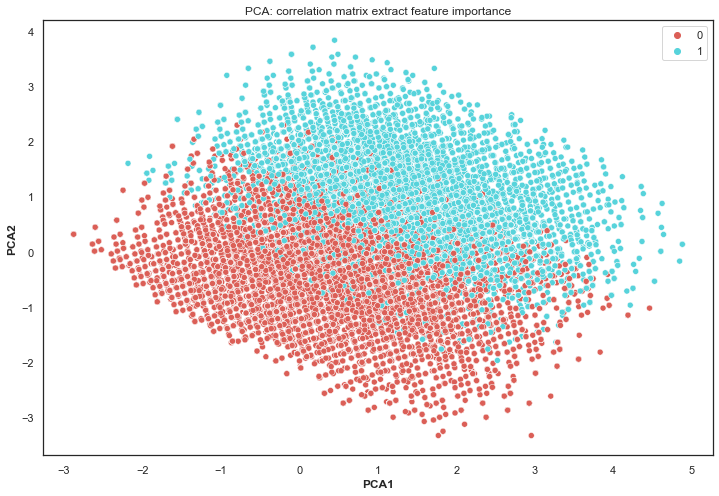

In [51]:
# Reduce data dimensions with PCA
pca = PCA().fit_transform(x_train[agg_features][:num_of_points])

plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=cluster.labels_, palette=sns.color_palette('hls', np.unique(y_train).shape[0]))
plt.xlabel('PCA1', weight='bold', fontsize='12')
plt.ylabel('PCA2', weight='bold', fontsize='12')
plt.title('PCA: correlation matrix extract feature importance')
plt.show()

#### conclusion:
From the t-SNE and PCA we can see that the split for satisfaction based on correlated features is the most clear one, which implies that this  approach is the best for feature selection. 

##### Find common features for all three approaches

In [52]:
common_features = set.intersection(*[set(list) for list in [svm_features, agg_features]])
print(f"Common impact features are:{common_features}")



Common impact features are:{'Type of Travel', 'Online boarding'}


#### Summary - features mainly affect customer satisfaction

Features selcetion was examined by 2 different methods as elaborited above:feature selection model using SVM and correlation matrix to extract feature highly correlated with satisfaction. All methods were then displayed using reduction algorithms: PCA and t-SNE.

From the polts above it can be seen that in all methods we didn't get perfect separation in clusters although its good enough to indicate that our feature selection was good. One main reason can be the fact that most of our features are not continuous variables. As PCA algorithm tries to minimize the variance the result using binary data makes PCA less meaningful.

In conclusion, after considering all methods, the features mainly affect customer satisfaction which all approaches had consensus are: 'Type of Travel', 'Online boarding'. Therefore these are the most important features. Other important features are considered as features who were selected by more than one method and include the following: 'Class', 'On-board service', 'Leg room service', 'Inflight entertainment', 'Inflight wifi service', 'Ease of Online booking'.


## 5. Classification Models
In this section four different classification models were used in order to predict customer satisfaction. The models were compared by their performances in order to select the best one. 
The models that we compared were:
1. RandomForestClassifier 
2. AdaBoostClassifier 
3. Neural Network 
4. GradientBoostingClassifier

In [53]:
#Define our features and target 
features = ['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
            'Inflight wifi service', 'Departure/Arrival time convenient',
            'Ease of Online booking', 'Food and drink', 'Online boarding',
            'Seat comfort', 'Inflight entertainment', 'On-board service',
            'Leg room service', 'Baggage handling', 'Checkin service',
            'Inflight service', 'Cleanliness']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
#y_train = train[target].to_numpy()
y_train =  np.asarray(train[target])
y_train = y_train.ravel()
X_test = test[features]
#y_test = test[target].to_numpy()
y_test = np.asarray(test[target])
y_test = y_test.ravel()

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [54]:
def run_model(model, model_param, X_train, y_train, X_test, y_test, verbose=True):
    clf=RandomizedSearchCV(model ,param_distributions=model_param,cv=10,scoring="accuracy",n_iter=20, n_jobs=-1,verbose=1)
    if verbose == False:
        clf.fit(X_train,y_train, verbose=0)
    else:
        clf.fit(X_train,y_train)
    
    print(clf.best_params_)
    best_grid = clf.best_estimator_
    y_pred = best_grid.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy = {}".format(accuracy))
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,labels=[0,1], digits=5))
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt="d", cmap = "Blues") 
    plt.show()     
    return model, accuracy, roc_auc, best_grid

#### Model 1: RandomForest Classifier

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 10, 'criterion': 'gini', 'bootstrap': False}
Accuracy = 0.9614932078297144
ROC_AUC = 0.9606993841622739
              precision    recall  f1-score   support

           0    0.95210   0.97591   0.96386      9837
           1    0.97249   0.94549   0.95880      8861

    accuracy                        0.96149     18698
   macro avg    0.96229   0.96070   0.96133     18698
weighted avg    0.96176   0.96149   0.96146     18698



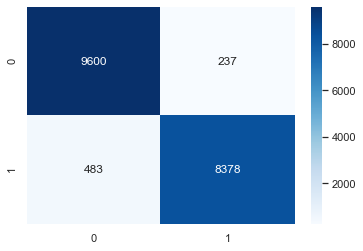

In [55]:
random_state=42
rf = RandomForestClassifier(random_state=random_state)

rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

model_rf,  accuracy_rf, roc_auc_rf, best_grid = run_model(rf,rf_param_grid, X_train, y_train, X_test, y_test)

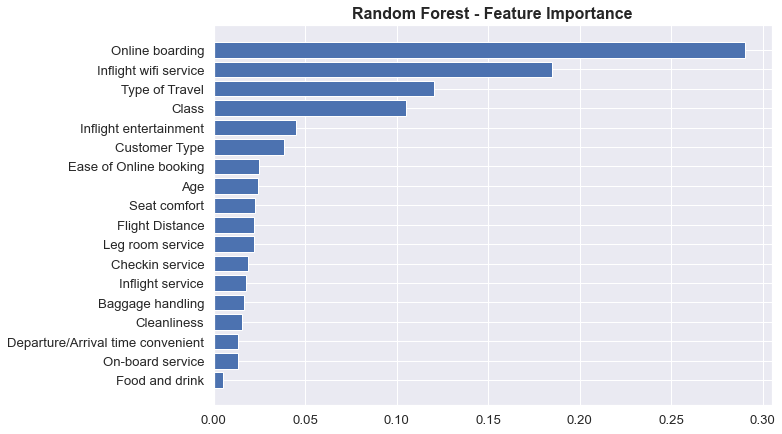

In [56]:
fi = pd.DataFrame({'feature': features, 'importance': best_grid.feature_importances_}).sort_values('importance', ascending = True)
sns.set(style='darkgrid',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
ax = plt.barh(fi['feature'],fi['importance'])
plt.title('Random Forest - Feature Importance',weight='bold',fontsize=16)
plt.savefig('featureplot.png',transparent=True, bbox_inches='tight')

#### Model 2: AdaBoost Classifier

C:\Users\bartimor\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'n_estimators': 100, 'learning_rate': 1}
Accuracy = 0.9294042143544764
ROC_AUC = 0.9289762021755885
              precision    recall  f1-score   support

           0    0.92924   0.93718   0.93319      9837
           1    0.92959   0.92078   0.92516      8861

    accuracy                        0.92940     18698
   macro avg    0.92941   0.92898   0.92918     18698
weighted avg    0.92941   0.92940   0.92939     18698



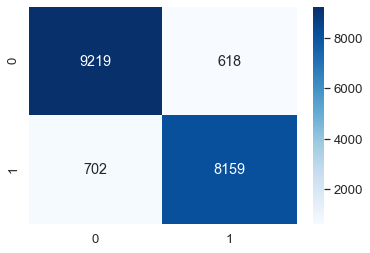

In [57]:
model_adab = AdaBoostClassifier(random_state=random_state)

adab_param_grid={'n_estimators': [50, 100, 200],
                'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1]}

model_adab,  accuracy_adab, roc_auc_adab, best_grid = run_model(model_adab,adab_param_grid, X_train, y_train, X_test, y_test)

#### Model 3: Neural Network (Multilayer Perceptron)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (30, 30, 30), 'alpha': 0.05, 'activation': 'relu'}
Accuracy = 0.957856455235854
ROC_AUC = 0.9569799146927785
              precision    recall  f1-score   support

           0    0.94757   0.97377   0.96049      9837
           1    0.96996   0.94019   0.95484      8861

    accuracy                        0.95786     18698
   macro avg    0.95877   0.95698   0.95767     18698
weighted avg    0.95818   0.95786   0.95782     18698



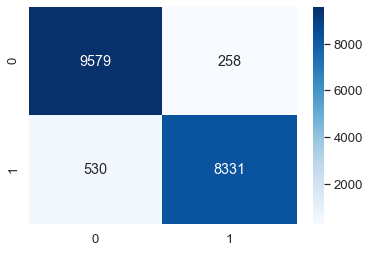

In [58]:
random_state=42

model_nn = MLPClassifier(random_state=random_state)

params_nn = {'hidden_layer_sizes': [(10,30,10),(20,), (30,30,30), (100,)],
    'activation': ['tanh', 'relu','logistic' ],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

model_nn,  accuracy_nn, roc_auc_nn, best_grid = run_model(model_nn,params_nn, X_train, y_train, X_test, y_test)

#### Model 4: Gradient Boosting

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.1}
Accuracy = 0.961225799550754
ROC_AUC = 0.9604564387095713
              precision    recall  f1-score   support

           0    0.95225   0.97520   0.96359      9837
           1    0.97171   0.94572   0.95854      8861

    accuracy                        0.96123     18698
   macro avg    0.96198   0.96046   0.96106     18698
weighted avg    0.96147   0.96123   0.96119     18698



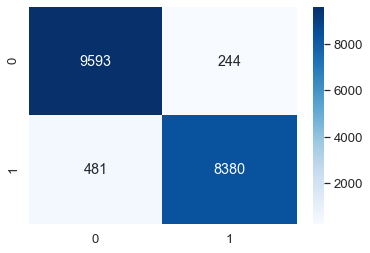

In [59]:
random_state=42

model_gbm = GradientBoostingClassifier(random_state=random_state)

params_gbm ={"n_estimators":[5,50,250,500],
             "max_depth":[1,3,5,7,9],
             "learning_rate":[0.01,0.1,1,10,100]}

model_gbm,  accuracy_gbm, roc_auc_gbm, best_grid = run_model(model_gbm,params_gbm, X_train, y_train, X_test, y_test)

#### Model Comparison
We will compare the performace of various models by their respective AUC score

In [60]:
auc_scores = [roc_auc_rf, roc_auc_adab, roc_auc_nn, roc_auc_gbm]
accuracy_scores = [accuracy_rf, accuracy_adab, accuracy_nn, accuracy_gbm]

model_data = {'Model': ['Random Forest','AdaBoost','Neural Network','GradientBoosting'],
              'ROC_AUC': auc_scores,
              'Accuracy': accuracy_scores}

model_data = pd.DataFrame(model_data)
model_data.head()

,Model,ROC_AUC,Accuracy
0,Random Forest,0.960699,0.961493
1,AdaBoost,0.928976,0.929404
2,Neural Network,0.956980,0.957856
3,GradientBoosting,0.960456,0.961226


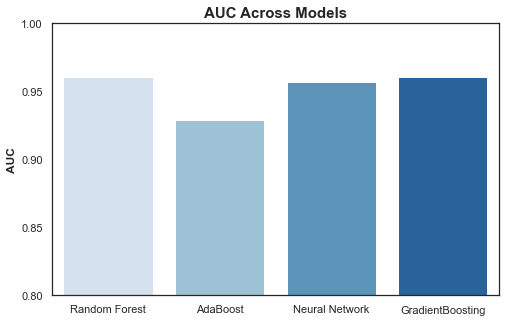

In [61]:
sns.set(style='white',font_scale=1)
fig = plt.figure(figsize=[8,5])
ax = sns.barplot(x='Model',y='ROC_AUC',data=model_data,palette='Blues')
#for p in ax.patches:
  #      ax.annotate(p.get_height().round(3), (p.get_x()+0.01, p.get_height()+0.001))
plt.ylim([0.8,1.0])
plt.yticks([0.80,0.85,0.90,0.95,1.00])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('AUC',weight='bold',fontsize='12')
plt.title('AUC Across Models',weight='bold',fontsize=15)
plt.show()

#### Conclusion
- RandomForestClassifier respective AUC score: 96%
- AdaBoostClassifier accuracy score: 92.89%
- Neural Network (Multilayer Perceptron) : 95.63%
- GradientBoostingClassifier: 95.97%

Random Forest has performed the best ROC_AUC score (95.9%). Neural Network and GradientBoosting have very similar ROC_AUC.
AdaBoost has the worst ROC_AUC.